# KG Generator Tool

## Let's get started by importing relevant libraries

In [ ]:
#pip install -r requirements.txt

In [ ]:
#pip install streamlit-agraph

In [6]:
from utils import *
#from kg_gen_4_onlyProts import *

from kg_gen_4 import *

#from IPython.display import Markdown, display

## Please execute following cells

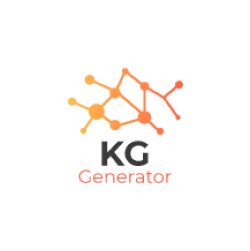

<span style='color:blue'>**Welcome to the KG Generator tool. In the following steps, we will need some inputs from your side.**</span>

Please enter the disease you are interested in and we will try to find the best matches for you.

Input: parkinson


index,id,name
0,MONDO_0021095,parkinsonian disorder
1,Orphanet_2828,Young adult-onset Parkinsonism
2,Orphanet_307052,Rare genetic parkinsonian disorder
3,MONDO_0005180,Parkinson disease
4,MONDO_0013060,autosomal recessive Parkinson disease 14
5,Orphanet_307055,Rare parkinsonian syndrome due to genetic neurodegenerative disease
6,MONDO_0008199,late-onset Parkinson disease
7,Orphanet_411602,Hereditary late-onset Parkinson disease
8,MONDO_0017279,young-onset Parkinson disease
9,EFO_1001175,secondary Parkinson disease


<span style='color:None'>**Here you go! Hopefully your disease of interest is in the list. If so, let's get started.**</span>

Please enter the index value of your disease of interest. Input: 3


Please enter the clinical trial phase of chemicals which should be identified by the workflow. Use a number between 1 (early phase) and 4 (FDA approved). For example, if you use 3, the KG will fetch chemicals that are in phase 3. Also, remember that lower the input value, higher will be the number of identified chemicals and therefore the running time of workflow also increases.


Your desired clinical trial phase: 1


Please provide a name for you KG. Input: pd_dec24


Now fetching real-time data from databases. Be patient!


 Fetching Disease-specific Drugs 
 Fetching Disease-specific Proteins 
 Fetching SNPs 
We have identified 4334 proteins (Swiss-Prot) associated with the disease. Please note that the proteins identified may not be unique if you combined two or more diseases. Following is a histogram that shows distribution of proteins based on scores provided by OpenTargets. The scores are influenced by various 

Protein,ENSG,UniProt,Source,Score,disease_id
LRRK2,ENSG00000188906,Q5S007,uniprot_swissprot,0.881,MONDO_0005180
PRKN,ENSG00000185345,O60260,uniprot_swissprot,0.858,MONDO_0005180
ATP13A2,ENSG00000159363,Q9NQ11,uniprot_swissprot,0.850,MONDO_0005180
PINK1,ENSG00000158828,Q9BXM7,uniprot_swissprot,0.847,MONDO_0005180
SNCA,ENSG00000145335,P37840,uniprot_swissprot,0.841,MONDO_0005180
PARK7,ENSG00000116288,Q99497,uniprot_swissprot,0.813,MONDO_0005180
DNAJC6,ENSG00000116675,O75061,uniprot_swissprot,0.801,MONDO_0005180
FBXO7,ENSG00000100225,Q9Y3I1,uniprot_swissprot,0.789,MONDO_0005180
PLA2G6,ENSG00000184381,O60733,uniprot_swissprot,0.772,MONDO_0005180
VPS35,ENSG00000069329,Q96QK1,uniprot_swissprot,0.759,MONDO_0005180


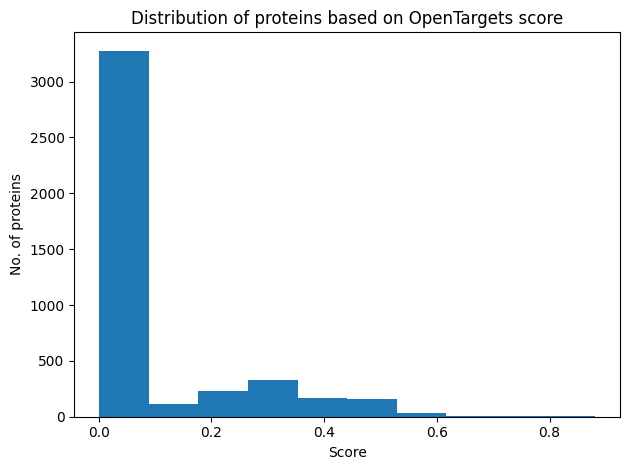



We recommend taking a threshold above 0.3 to exclude loosely associated proteins. 
Please enter your desired threshold: 0.0


Alright, we are good to go now. Your KG is now being generated! Sit back and relax!!

 Total no. of proteins:  4334

      Protein        ENSG       UniProt       Source        Score   disease_id  
0       LRRK2  ENSG00000188906  Q5S007  uniprot_swissprot  0.881  MONDO_0005180
1        PRKN  ENSG00000185345  O60260  uniprot_swissprot  0.858  MONDO_0005180
2     ATP13A2  ENSG00000159363  Q9NQ11  uniprot_swissprot  0.850  MONDO_0005180
3       PINK1  ENSG00000158828  Q9BXM7  uniprot_swissprot  0.847  MONDO_0005180
4        SNCA  ENSG00000145335  P37840  uniprot_swissprot  0.841  MONDO_0005180
...       ...              ...     ...                ...    ...            ...
4329    KCNE4  ENSG00000152049  Q8WWG9  uniprot_swissprot  0.001  MONDO_0005180
4330  ANKRD37  ENSG00000186352  Q7Z713  uniprot_swissprot  0.001  MONDO_0005180
4331      TUB  ENSG00000166402  P5

Fetching Protein-related info:   0%|          | 0/4326 [00:00<?, ?it/s]

A total of 169 drugs have been identified. Now fetching relevant data


Retrieving mechanisms from ChEMBL:   0%|          | 0/169 [00:00<?, ?it/s]

Retrieving bioassays from ChEMBL:   0%|          | 0/169 [00:00<?, ?it/s]

Filtering UniProt proteins from ChEMBL:   0%|          | 0/204 [00:00<?, ?it/s]

Filtering human proteins from ChEMBL:   0%|          | 0/204 [00:00<?, ?it/s]

Populating ChEMBL data for human proteins:   0%|          | 0/204 [00:00<?, ?it/s]

Populating Chemical-MoA edges:   0%|          | 0/122 [00:00<?, ?it/s]

Adding bioassay edges to BEL:   0%|          | 0/79 [00:00<?, ?it/s]

Retrieving Adverse Effects for each drug:   0%|          | 0/169 [00:00<?, ?it/s]

Populating Uniprot edges:   0%|          | 0/4326 [00:00<?, ?it/s]

Filtering Proteins/Genes:   0%|          | 0/170210 [00:00<?, ?it/s]

A total of 772 SNPs have been identified from GWAS Central. Now adding relevant data




Adding disease associated SNPs:   0%|          | 0/772 [00:00<?, ?it/s]

Your KG is now generated! 

Now let's save all the files that were created in the process. 

Please enter the location (e.g. 'C:\Users\rkarki\Documents\kg\' ) where KG files should be stored. A folder will be created automatically. 

Input: C:\Users\reagon.karki\Documents\GitHub\kgg\data\kgs\ndd\


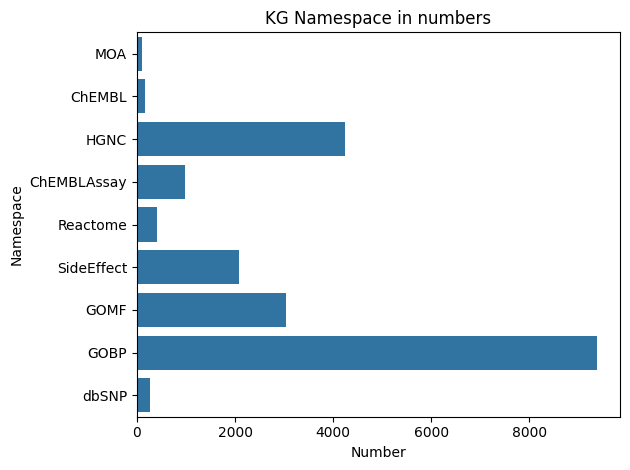

In [5]:
kg = createKG()

In [ ]:
kg.summarize

In [ ]:
#kg.to_csv('data/kgs/test/cvd.csv')

In [ ]:
infile = open('data/kgs/ndd/ndd_angela/ndd_angela.pkl','rb')
kg = pickle.load(infile)
infile.close()

In [ ]:
aa = kg.summarize.namespaces()

In [ ]:
pd.DataFrame([kg.count.namespaces()])

In [ ]:
df = dict(kg.count.namespaces())

In [ ]:
df = pd.DataFrame([df]).T

In [ ]:
df = df.reset_index()

In [ ]:
df.columns = ['Namespace','Numbers']

In [ ]:
df

In [ ]:
fig = px.bar(df,x='Namespace',y='Numbers',color='Namespace')
fig.update_layout(title_text='KG namespaces in numbers', title_x=0.5)

In [ ]:
pybel.struct.summary.get_top_hubs(kg) 

In [ ]:
kg.number_of_nodes()

In [ ]:
#to_jupyter(kg)

In [ ]:
#prtns = pd.read_csv('data/kgs/viral_diseases/covid_test_march25/diseaseAssociatedProteins.csv')
df = pd.read_csv('data/kgs/viral_diseases/covid_test_march25/diseaseAssociatedDrugs.csv')
prtn = list(df['approvedSymbol'][:5])
chem = list(df['drugId'][:5])
query = prtn + chem

In [ ]:
query

In [ ]:
query_graph = filter_graph(kg,query)

In [ ]:
to_jupyter(query_graph)

In [ ]:
KG_namespace_plot(kg,'ad')

In [ ]:
test = pd.read_csv('data/kgs/test/t2dm.csv')
test.head(5)
test = list(set(list(test['UniProt'])))
len(test)

In [ ]:
def ExtractFromUniProt(uniprot_id) -> dict:
    """Uniprot parser to retrieve information about OMIM disease, reactome pathway, biological process,
     and molecular functions.

    :param uniprot_id:
    :return:
    """
    Uniprot_Dict = []

    mapped_uprot = []

    for id in tqdm(uniprot_id, desc='Fetching Protein-related info'):
        
        print(id)

        # Retrieve data for id in text format if found in uniprot
        ret_uprot = requests.get(
            'https://www.uniprot.org/uniprot/' + id + '.txt'
        ).text.split('\n')
        
        #return(ret_uprot)

        if ret_uprot == ['']:
            continue

        id_copy = id
        mapped_uprot.append(id_copy)
        i = 0
        j = 0
        k = 0
        id = {}
        id['Disease'] = {}
        id['Reactome'] = {}
        id['Function'] = {}
        id['BioProcess'] = {}
        id['Gene'] = {}

        # parse each line looking for info about disease, pathway, funcn, bp and so on
        for line in ret_uprot:
            # parse lines with disease and extract disease names and omim ids
            if '-!- DISEASE:' in line:
                if ('[MIM:' in line):
                    dis = line.split(':')
                    id['Disease'].update({dis[1][1:-5]: dis[2][:-1]})

            # extract reactome ids and names
            if 'Reactome;' in line:
                ract = line.split(';')
                id['Reactome'].update({ract[2][1:-2]: ract[1][1:]})

            # look for functions
            if ' F:' in line:
                if j < 5:
                    fn = line.split(';')
                    id['Function'].update({fn[2][3:]: fn[1][1:]})
                    j += 1

            # look for biological processes
            if ' P:' in line and 'GO;' in line:
                if i < 5:
                    bp = line.split(';')
                    # bp returns list with GO ids and names
                    id['BioProcess'].update({bp[2][3:]: bp[1][1:]})
                    i += 1

            if 'GN   Name' in line:
                if k == 0:
                    gene = line.split('=')
                    gene = gene[1].split(' ')
                    if ';' in gene[0]:
                        gene = gene[0].split(';')
                        gene = {'Gene': gene[0]}
                    else:
                        gene = {'Gene': gene[0]}
                    id.update(gene)
                    k += 1

        Uniprot_Dict.append(id)

    Uniprot_Dict = dict(zip(mapped_uprot, Uniprot_Dict))

    return Uniprot_Dict

In [ ]:
xx = ExtractFromUniProt(test[4790:4800])

In [ ]:
xx

# Additional stuff

In [ ]:
infile= open('data/kgs/ndd/ad/ad.pkl','rb')
graph= pickle.load(infile)
infile.close()

In [ ]:
graph.summarize

In [ ]:
prot = pd.read_csv('data/kgs/ndd/ad/diseaseAssociatedProteins.csv')
prot = list(prot['Protein'])
prot = prot[1:6]

chem = pd.read_csv('data/kgs/ndd/ad/diseaseAssociatedDrugs.csv')
chem = list(chem['drugId'])
chem = chem[1:6]

prot_chem = prot + chem

In [ ]:
prot_chem

In [ ]:
query_graph = filter_graph(graph,prot_chem)

In [ ]:
to_jupyter(query_graph)

In [ ]:
prtn_attr = nx.get_node_attributes(graph,'UniProt')
bionote_attr = nx.get_node_attributes(graph,'3Dbio')

for node in graph.nodes():
    unique_node = []
    
    if node.name in prot:
        if node not in unique_node:
            
            unique_node.append(node)
            print(node.name)
       
            if isinstance(node,pybel.dsl.Abundance):
                print(chem_attr[node])
                
            if isinstance(node,pybel.dsl.Protein):
                print(prtn_attr[node])
                
            if isinstance(node,pybel.dsl.Protein):
                print(bionote_attr[node])

In [ ]:
17*40000000*20000000

In [ ]:
13600000000000000/105004

In [ ]:
129518875471/20509

In [ ]:
def GetDiseaseAssociatedDrugs(disease_id,CT_phase):

    efo_id = disease_id
    size = getDrugCount(efo_id)

    query_string = """
        query associatedTargets($my_efo_id: String!, $my_size: Int){
          disease(efoId: $my_efo_id){
            id
            name
            knownDrugs(size:$my_size){
                uniqueTargets
                uniqueDrugs
                count
                rows{
                    approvedSymbol
                    approvedName
                    prefName
                    drugType
                    drugId
                    phase
                    ctIds
                }

            }
          }
        }

    """

    #replace $efo_id with value from efo_id
    #query_string = query_string.replace("$efo_id",f'"{efo_id}"')
    #query_string = query_string.replace("$efo_id",f'"{efo_id}"')

    # Set variables object of arguments to be passed to endpoint
    variables = {"my_efo_id": efo_id, "my_size": size}

    # Set base URL of GraphQL API endpoint
    base_url = "https://api.platform.opentargets.org/api/v4/graphql"

    # Perform POST request and check status code of response
    r = requests.post(base_url, json={"query": query_string, "variables": variables})
    #r = requests.post(base_url, json={"query": query_string})
    #print(r.status_code)

    # Transform API response from JSON into Python dictionary and print in console
    api_response = json.loads(r.text)
    return(api_response)
    
    if api_response['data']['disease']['knownDrugs']['uniqueTargets'] == 0:
        
        print('No drugs found in clinical trials for ' + str(api_response['data']['disease']['name']))
        
    else:
    
        df = pd.DataFrame(api_response['data']['disease']['knownDrugs']['rows'])
        df = df.loc[df['phase'] >= int(CT_phase),:]

        if not df.empty:
            df['id'] = efo_id
            df['disease'] = api_response['data']['disease']['name']
            #print('Your dataframe is ready')
            return(df)
    
#     else:
#         print('No drugs found in clinical trials')
    

In [ ]:
tt = GetDiseaseAssociatedDrugs('MONDO_0008903',1)

In [ ]:
tt

In [ ]:
def GetViralProteins(query_disease):
    
    # file downloaded from https://www.genome.jp/ftp/db/virushostdb Dated: 12/09/2023
    virus = pd.read_csv('https://raw.githubusercontent.com/Fraunhofer-ITMP/kgg/main/data/virushostdb.csv')
    
    cols = ['virus tax id','virus name','DISEASE','host tax id']
    virus = virus[cols]
    
    #print(virus)

    #filter virus with host humans 
    virus = virus.loc[virus['host tax id'] == 9606.0,:]
    virus = virus.reset_index(drop=True)
    
    #replace 9606.0 to 9606
    virus["host tax id"] = pd.to_numeric(virus["host tax id"], downcast='integer')
    
    #get the initial keyword for disease search
    #disease = GetQuery()
    
    #subset df with disease keyword
    virus_subset_1 = virus[virus['DISEASE'].str.contains(query_disease,na=False,case=False)]
    
    if not virus_subset_1.empty:

        #print(disease)
        print('\n')
        print('The workflow has identified your query as a viral disease. Its proteins (SWISS-Prot) will be now represented in the KG.','\n')

        time.sleep(0.1)

        virus_name = input('Do you want to look further for a specific virus? Please type its name or skip it by typing \'no\': ')

        #subset df with virus name
        if virus_name.lower() != 'no':

            virus_subset_2 = virus[virus['virus name'].str.contains(virus_name,na=False,case=False)]
            #print(virus_subset_2)
            #break
        else:
            virus_subset_2 = pd.DataFrame()

        #merge subsets of df_1 and df_2
        virus_subset_merge = pd.concat([virus_subset_1,virus_subset_2])

        virus_subset_merge = virus_subset_merge.drop_duplicates(keep='first')

        virus_subset_merge = virus_subset_merge.reset_index(drop=True)

        virus_subset_merge['index'] = virus_subset_merge.index

        virus_subset_merge.style.hide(axis='index')  

        virus_subset_merge = virus_subset_merge[['index','virus tax id','virus name','DISEASE','host tax id']]
        display(HTML(virus_subset_merge.to_html(index=False)))
        

        time.sleep(0.1)
        temp_id = input('Enter the index value(s). If multiple, use space, for example -> 0 1 3: ')

        print('\n')

        temp_id = temp_id.split(' ')
        temp_id = [int(x) for x in temp_id]
        #print(virus_subset_merge.loc[0]['virus tax id'])

        uprot_list = []

        for item in temp_id:

            tax_id = virus_subset_merge.loc[item]['virus tax id']
            #print(tax_id)

            #fetch tax id related proteins from Uniprot
            #the link can be created from downloads option in uniprot
            query_string = 'https://rest.uniprot.org/uniprotkb/stream?fields=accession%2Creviewed%2Cid%2Cgene_names%2Corganism_name%2Clength%2Cgene_primary%2Cprotein_name&format=tsv&query=%28%28taxonomy_id%3A'+str(tax_id)+'%29+AND+%28reviewed%3Atrue%29%29'

            #query_string = 'https://rest.uniprot.org/uniprotkb/stream?fields=accession%2Creviewed%2Cid%2Cgene_names%2Corganism_name%2Clength%2Cgene_primary%2Cprotein_name&format=tsv&query=%28%28taxonomy_id%3A11676%29%29+AND+%28reviewed%3Atrue%29'

            query_uniprot = requests.get(query_string)
            query_uniprot = query_uniprot.text.split('\n')

            query_uniprot_df = pd.DataFrame([x.strip().split('\t') for x in query_uniprot])
            cols = query_uniprot_df.iloc[0]
            #print(cols)
            query_uniprot_df = query_uniprot_df[1:len(query_uniprot_df)-1]
            query_uniprot_df.columns = cols
            temp = list(query_uniprot_df['Entry'])
            #print(len(temp))
            uprot_list.append(temp)

        uprot_list = [item for sublist in uprot_list for item in sublist]
        
        print('A total of',str(len(uprot_list)), 'viral proteins have been identified.','\n')
        
        return(uprot_list)

In [ ]:
test = GetViralProteins('influenza')

In [ ]:
def GetDiseaseSNPs(disease_id): 
    
    import requests
    
    doid = disease_id.split("_")
    #print(doid)
    
    #For this example we are going to use the python default http library
    

    #Build a dict with the following format, change the value of the two keys your DisGeNET account credentials, if you don't have an account you can create one here https://www.disgenet.org/signup/ 
    auth_params = {"email":"reagonkarki@gmail.com","password":"Bhunti.87"}

    api_host = "https://www.disgenet.org/api"

    api_key = 'e25cb13382cb9b016247822c49f325f75991e607'
    s = requests.Session()

    if api_key:
        #Add the api key to the requests headers of the requests Session object in order to use the restricted endpoints.
        s.headers.update({"Authorization": "Bearer %s" % api_key}) 
        #Lets get all the diseases associated to a gene eg. APP (EntrezID 351) and restricted by a source.

        #https://www.disgenet.org/api/vda/disease/D000544
    
        gda_response = s.get(api_host+'/vda/disease/'+str(doid[0]).lower()+ "/" +str(doid[1]) +'?format=json')
        #gda_response = s.get(api_host+'/gda/gene/351', params={'source':'UNIPROT'})

        if gda_response:
        
            gda_response = gda_response.json()
            gda_response = pd.DataFrame(gda_response)
            gda_response['disease_id'] = disease_id
            return(gda_response)

    if s:
        s.close()

In [ ]:
xx = GetDiseaseSNPs('MONDO_0005148')

In [ ]:
https://www.disgenet.org/api/vda/disease/MONDO0005148/

In [ ]:
x = list(range(1,10))

In [ ]:
x

In [ ]:
y = [3,5]

In [ ]:
z = [i for i in x if i not in y]

In [ ]:
y

In [ ]:
for item in y:
    x.remove(item)

In [ ]:
x

In [ ]:
x.pop(1)

In [ ]:
x

In [ ]:
data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')

In [ ]:
data

In [ ]:
data.rename(columns={'Unnamed: 0':'brand'}, inplace=True)

In [ ]:
fig, ax = plt.subplots()
ax.hist(data['cyl'])
ax.set_title('Distribution of proteins based on OpenTargets score')
ax.set_xlabel('Score')
ax.set_ylabel('No. of proteins')

fig.tight_layout()
plt.show()

In [ ]:
x = max(data['mpg'])
x

In [ ]:
data = data.loc[data['mpg'] >= float(21.5),:]

In [ ]:
data

In [ ]:
# creating the bar plot
fig = plt.figure(figsize = (10, 5))
plt.bar(data['brand'], data['hp'], color ='blue', width = 0.2)

In [ ]:
def ExtractFromUniProt(uniprot_id) -> dict:
    """Uniprot parser to retrieve information about OMIM disease, reactome pathway, biological process,
     and molecular functions.

    :param uniprot_id:
    :return:
    """
    Uniprot_Dict = []

    mapped_uprot = []

    for id in tqdm(uniprot_id, desc='Fetching Protein-related info'):

        # Retrieve data for id in text format if found in uniprot
        ret_uprot = requests.get(
            'https://www.uniprot.org/uniprot/' + id + '.txt'
        ).text.split('\n')
        
        #return(ret_uprot)

        if ret_uprot == ['']:
            continue

        id_copy = id
        mapped_uprot.append(id_copy)
        
        #counters for bf and bp
        #i = 0
        #j = 0
        k = 0
        id = {}
        id['PDB'] = {}
        id['Gene'] = {}
        temp = []
        #id['Reactome'] = {}


        # parse each line looking for info about disease, pathway, funcn, bp and so on
        for line in ret_uprot:
            #temp = []
            
            
        
            if 'GN   Name' in line:
                if k == 0:
                    gene = line.split('=')
                    gene = gene[1].split(' ')
                    if ';' in gene[0]:
                        gene = gene[0].split(';')
                        gene = {'Gene': gene[0]}
                    else:
                        gene = {'Gene': gene[0]}
                    id.update(gene)
                    k += 1
                    
            if 'PDB;' in line:
                
                #print(line)
                pdb = line.split(';')
                #print(pdb)
                pdb = pdb[1][1:]
                #print(pdb)
                temp.append(pdb)
                #id['PDB'].update({pdb:pdb})
        #print(temp)
        id['PDB'] = temp
               #print(id)
                #return(pdb)
                
        #return(temp)

#             if 'GN   Name' in line:
#                 if k == 0:
#                     gene = line.split('=')
#                     gene = gene[1].split(' ')
#                     if ';' in gene[0]:
#                         gene = gene[0].split(';')
#                         gene = {'Gene': gene[0]}
#                     else:
#                         gene = {'Gene': gene[0]}
#                     id.update(gene)
#                     k += 1


            # extract reactome ids and names
#             if 'Reactome;' in line:
#                 ract = line.split(';')
#                 id['Reactome'].update({ract[2][1:-2]: ract[1][1:]})


        Uniprot_Dict.append(id)

    Uniprot_Dict = dict(zip(mapped_uprot, Uniprot_Dict))

    return Uniprot_Dict

In [ ]:
uprot = pd.read_csv('data/kgs/ndd/ndd_angela/diseaseAssociatedProteins.csv')

In [ ]:
uprot.head(5)

In [ ]:
xx = ExtractFromUniProt(list(uprot['UniProt']))

In [ ]:
xx

In [ ]:
# filename = ('data/kgs/ndd/ndd_angela/pdb.pkl')
# outfile = open(filename,'wb')
# pickle.dump(xx,outfile)

In [ ]:
infile = open('data/kgs/ndd/ndd_angela/pdb.pkl','rb')
xx = pickle.load(infile)
infile.close()

In [ ]:
xx

In [ ]:
test = pd.DataFrame(xx)

In [ ]:
test

In [ ]:
test.to_csv('data/kgs/ndd/ndd_angela/pdb_2176_prots.csv')

In [ ]:
test = pd.read_csv('data/kgs/ndd/ndd_angela/pdb_2176_prots.csv',header=None)

In [ ]:
test

In [ ]:
test =test.transpose()

In [ ]:
cols = ['UniProt','PDB_ids','Protein']

In [ ]:
test.columns=cols

In [ ]:
test.to_csv('data/kgs/ndd/ndd_angela/pdb_2176_prots.csv',index=False)

In [ ]:
f = open("data/kgs/ndd/ndd_angela/P33897.txt", "r")

In [ ]:
for line in f:
    print(line)
    

In [ ]:
f = open("data/kgs/ndd/ndd_angela/P33897.txt", "r")
for line in f:
    print(line) 
    x = line
    #break

In [ ]:
x

In [ ]:
import animation
import time

@animation.simple_wait
def long_running_function():
    #... 5 seconds later ...
    return

In [ ]:
long_running_function()

In [ ]:
import animation
import time

@animation.wait('bar')
def long_running_function():
    #... 5 seconds later ...
    return
long_running_function()

@animation.wait('spinner')
def long_running_function():
    #... 5 seconds later ...
    return

In [ ]:
long_running_function()

In [ ]:
#
chembl2act = RetAct(['CHEMBL125','CHEMBL25'])

In [ ]:
chembl2act

In [ ]:
for chemical, chem_entries in tqdm(chembl2act.items()):
    print(chemical)
    print(chem_entries)
    break

In [ ]:
prtn_as_chembl = Ret_chembl_protein(chembl2act)
prtn_as_chembl = set(prtn_as_chembl)
prtn_as_chembl = list(prtn_as_chembl)
chembl2uprot = chembl2uniprot(prtn_as_chembl)

In [ ]:
chembl2uprot

In [ ]:
prtn_as_chembl

In [ ]:
for item in chembl2uprot:
    print(chembl2uprot[item][-2])

In [ ]:
prot_list = ['Q6XQN6']

In [ ]:
kg = pybel.BELGraph(name='test', version="0.0.1")

In [ ]:
chembl2act = chembl2gene2path(chembl2uprot, chembl2act)

In [ ]:
chembl2act

In [ ]:
def chem2act_rel(
    named_ActList,
    org,otp_prots,
    graph: BELGraph
) -> BELGraph:
    """Method to add bioassay edges to the KG.

    :param named_ActList:
    :param org:
    :param graph:
    :return:
    """
    for chemical, chem_entries in tqdm(named_ActList.items(), desc='Adding bioassay edges to BEL'):
        for chem_data in chem_entries:
            if chem_data['target_chembl_id']:
                if 'Protein' in chem_data and chem_data['Accession'] in otp_prots:
                    graph.add_association(
                        Abundance(namespace='ChEMBLAssay', name=chem_data['assay_chembl_id']),
                        Protein(namespace=org, name=chem_data['Protein']),
                        citation='ChEMBL database',
                        evidence='ChEMBL query'
                    )
                # else:
                    # graph.add_association(
                        # Abundance(namespace='ChEMBLAssay', name=chem_data['assay_chembl_id']),
                        # Protein(namespace=org, name=chem_data['target_chembl_id']),
                        # citation='ChEMBL database',
                        # evidence='ChEMBL query'
                    # )

            graph.add_association(
                Abundance(namespace='ChEMBL', name=chemical),
                Abundance(namespace='ChEMBLAssay', name=chem_data['assay_chembl_id']),
                citation='ChEMBL database',
                evidence='ChEMBL query',
                annotation={
                    'assayType': chem_data['assay_type'],
                    'pChEMBL': chem_data['pchembl_value']
                }
            )

    return graph

In [ ]:
kg = chem2act_rel(chembl2act,'HGNC',['Q6XQN6','P23219','dkslfdslkf'],kg)

In [ ]:
to_jupyter(kg)

In [ ]:
def gene2path_rel(
    named_chem2geneList,
    org,otp_prots,
    graph
) -> BELGraph:
    """Method to add protein and reactome data to KG

    :param named_chem2geneList:
    :param org:
    :param graph:
    :return:
    """
    for item in named_chem2geneList:
        itemLen = len(named_chem2geneList[item]) - 1
        for j in range(itemLen - 1):
            
            #checks if uprot id is in otp_proteins
            if named_chem2geneList[item][itemLen - 1]['accession'] in otp_prots:
            
                graph.add_association(
                    Protein(namespace=org, name=named_chem2geneList[item][itemLen]['component_synonym']),
                    BiologicalProcess(namespace='Reactome', name=named_chem2geneList[item][j]['xref_name']),
                    citation='ChEMBL database',
                    evidence='ChEMBL query',
                    annotation={
                        'Reactome': 'https://reactome.org/content/detail/'+named_chem2geneList[item][j]['xref_id']
                    }
                )

    return graph

In [ ]:
kg = gene2path_rel(chembl2uprot,'HGNC',['Q6XQN6'],kg)

In [ ]:
to_jupyter(kg)

In [ ]:
named_chem2geneList = chembl2uprot
named_chem2geneList

In [ ]:
for item in named_chem2geneList:
    #print(named_chem2geneList[item])
    for obj in named_chem2geneList[item]:
        for k,v in obj.items():
            print(k,v)

In [ ]:
for k,v in named_chem2geneList.items():
    #print(k,v)
    for item in v:
        #print(item.keys())
        if 'accession' in item.keys():
            print(item)

In [ ]:
named_chem2geneList

In [ ]:
for item in named_chem2geneList:
    #print(item)
    #print(named_chem2geneList[item])
    itemLen = len(named_chem2geneList[item]) - 1
    #print(itemLen)
    for j in range(itemLen - 1):
        #print(j)
        #print(named_chem2geneList[item][itemLen]['component_synonym'])
        if named_chem2geneList[item][itemLen - 1]['accession'] in otp_prots:

    #         graph.add_association(
    #             Protein(namespace=org, name=named_chem2geneList[item][itemLen]['component_synonym']),
    #             BiologicalProcess(namespace='Reactome', name=named_chem2geneList[item][j]['xref_name']),
    #             citation='ChEMBL database',
    #             evidence='ChEMBL query',
    #             annotation={
    #                 'Reactome': 'https://reactome.org/content/detail/'+named_chem2geneList[item][j]['xref_id']
    #             }
    #         )